In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('seaborn')
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df['Age'] = 2021 - df['Year']
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [7]:
df2=df.drop('Year', axis=1)
df2.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [8]:
df3=df2.rename(columns={'Owner': 'Past_Owners'})
df3.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


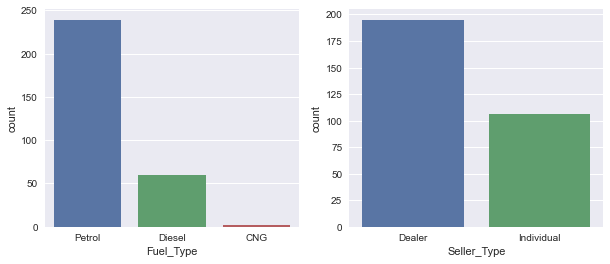

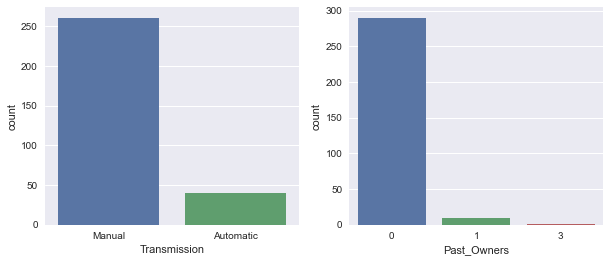

In [9]:
col= ['Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners']
i=0
while i <4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=col[i], data=df3)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=col[i], data=df3)
    i += 1
    
    plt.show()

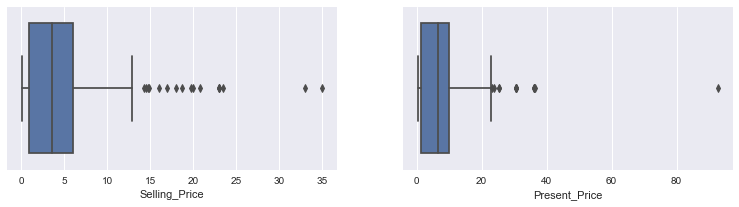

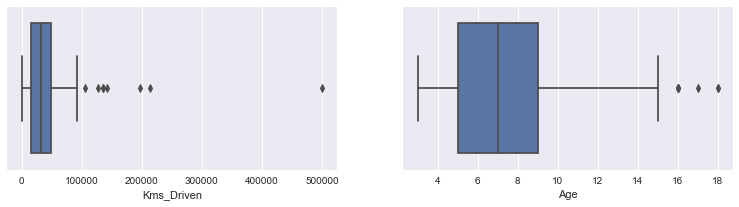

In [10]:
num_cols = ['Selling_Price','Present_Price','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df3)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df3)
    i += 1
    
    plt.show()

In [11]:
le_col = ['Fuel_Type', 'Seller_Type', 'Transmission']
le = LabelEncoder()
for c in le_col:
    df3[c] = le.fit_transform(df3[c])

In [12]:
df3.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,ritz,3.35,5.59,27000,2,0,1,0,7
1,sx4,4.75,9.54,43000,1,0,1,0,8
2,ciaz,7.25,9.85,6900,2,0,1,0,4
3,wagon r,2.85,4.15,5200,2,0,1,0,10
4,swift,4.60,6.87,42450,1,0,1,0,7


In [13]:
x = df3.drop(['Car_Name', 'Selling_Price'], axis=1)
x

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,5.59,27000,2,0,1,0,7
1,9.54,43000,1,0,1,0,8
2,9.85,6900,2,0,1,0,4
3,4.15,5200,2,0,1,0,10
4,6.87,42450,1,0,1,0,7
...,...,...,...,...,...,...,...
296,11.60,33988,1,0,1,0,5
297,5.90,60000,2,0,1,0,6
298,11.00,87934,2,0,1,0,12
299,12.50,9000,1,0,1,0,4


In [14]:
y = df3['Selling_Price']
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [56]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=35, random_state=1)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=35, random_state=1)

In [57]:
model.score(x_test, y_test)

0.9052370765756693

In [25]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [26]:
model.score(x_test, y_test)

0.8484549412090379